## Makine Öğrenmesi Dönem Projesi, Kemal BEYDİLLİ, 212803045
## Gerekli Kitaplıkların Import Edilmesi

In [9]:
#veri analiz kütüphaneleri 
import pandas as pd
import numpy as np

#Görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Enerji verisini import etme (excel dosyasından)
df = pd.read_excel("EnergyData.xlsx")

In [11]:
df.head()

,Day,production_pieces,average_weight,cycle_time,stoppage_rate,scrap_rate,electricity_consumption
0,2022-01-01,NaN,NaN,NaN,NaN,NaN,0.000
1,2022-01-02,NaN,NaN,NaN,NaN,NaN,0.000
2,2022-01-03,18359.0,2.349763,17.780925,0.278472,0.000000,6186.224
3,2022-01-04,14989.0,2.526441,17.637201,0.402778,0.001001,6251.343
4,2022-01-05,19613.0,2.050241,17.748432,0.225694,0.000714,6961.466


In [12]:
# verinin şekli (shape)
df.shape

(669, 7)

In [13]:
# Veri İle İlgili kısa bilgiler : veri türü, boş alan var yok 
# 669 satır günlük veri varken üretim adeti olan gün sayısı 485, 
# çoğu haftasonu ve idari izinlerde (bayram, yılbaşı vs)üretim yapılmadığı için üretim olmayan günler var.
# tüm kolonlar nümerik iken Day kolonu tarih formatında
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Day                      669 non-null    datetime64[ns]
 1   production_pieces        485 non-null    float64       
 2   average_weight           485 non-null    float64       
 3   cycle_time               485 non-null    float64       
 4   stoppage_rate            485 non-null    float64       
 5   scrap_rate               485 non-null    float64       
 6   electricity_consumption  669 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 36.7 KB


In [14]:
# describe() metodu ile nümerik alanların istatistiksel özelliklerini görelim
df.describe()

,Day,production_pieces,average_weight,cycle_time,stoppage_rate,scrap_rate,electricity_consumption
count,669,485.000000,485.000000,485.000000,485.000000,485.000000,669.000000
mean,2022-12-01 00:00:00,14701.907216,2.321698,17.490734,0.396271,0.003179,3928.575428
min,2022-01-01 00:00:00,22.000000,1.203147,10.113158,0.000000,0.000000,0.000000
25%,2022-06-17 00:00:00,12076.000000,1.894635,17.363486,0.261111,0.000000,0.000000
50%,2022-12-01 00:00:00,16605.000000,2.172270,17.630372,0.332639,0.000720,5317.334000
75%,2023-05-17 00:00:00,18597.000000,2.560009,17.870737,0.485417,0.001956,6251.343000
max,2023-10-31 00:00:00,23070.000000,7.838254,18.000000,0.995833,0.455959,7468.541000
std,NaN,5414.618591,0.732138,0.670771,0.194991,0.022602,2731.295254


In [15]:
# Eksik Veri Sayısını Bulalım
# üretim olmayan günler diğer x verileri de yok
df.isna().sum()

Day                          0
production_pieces          184
average_weight             184
cycle_time                 184
stoppage_rate              184
scrap_rate                 184
electricity_consumption      0
dtype: int64

C:\Users\kembe\AppData\Local\Temp\ipykernel_24260\1797834292.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[index]], ax=ax[i][j], bins=40)
C:\Users\kembe\AppData\Local\Temp\ipykernel_24260\1797834292.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[index]], ax=ax[

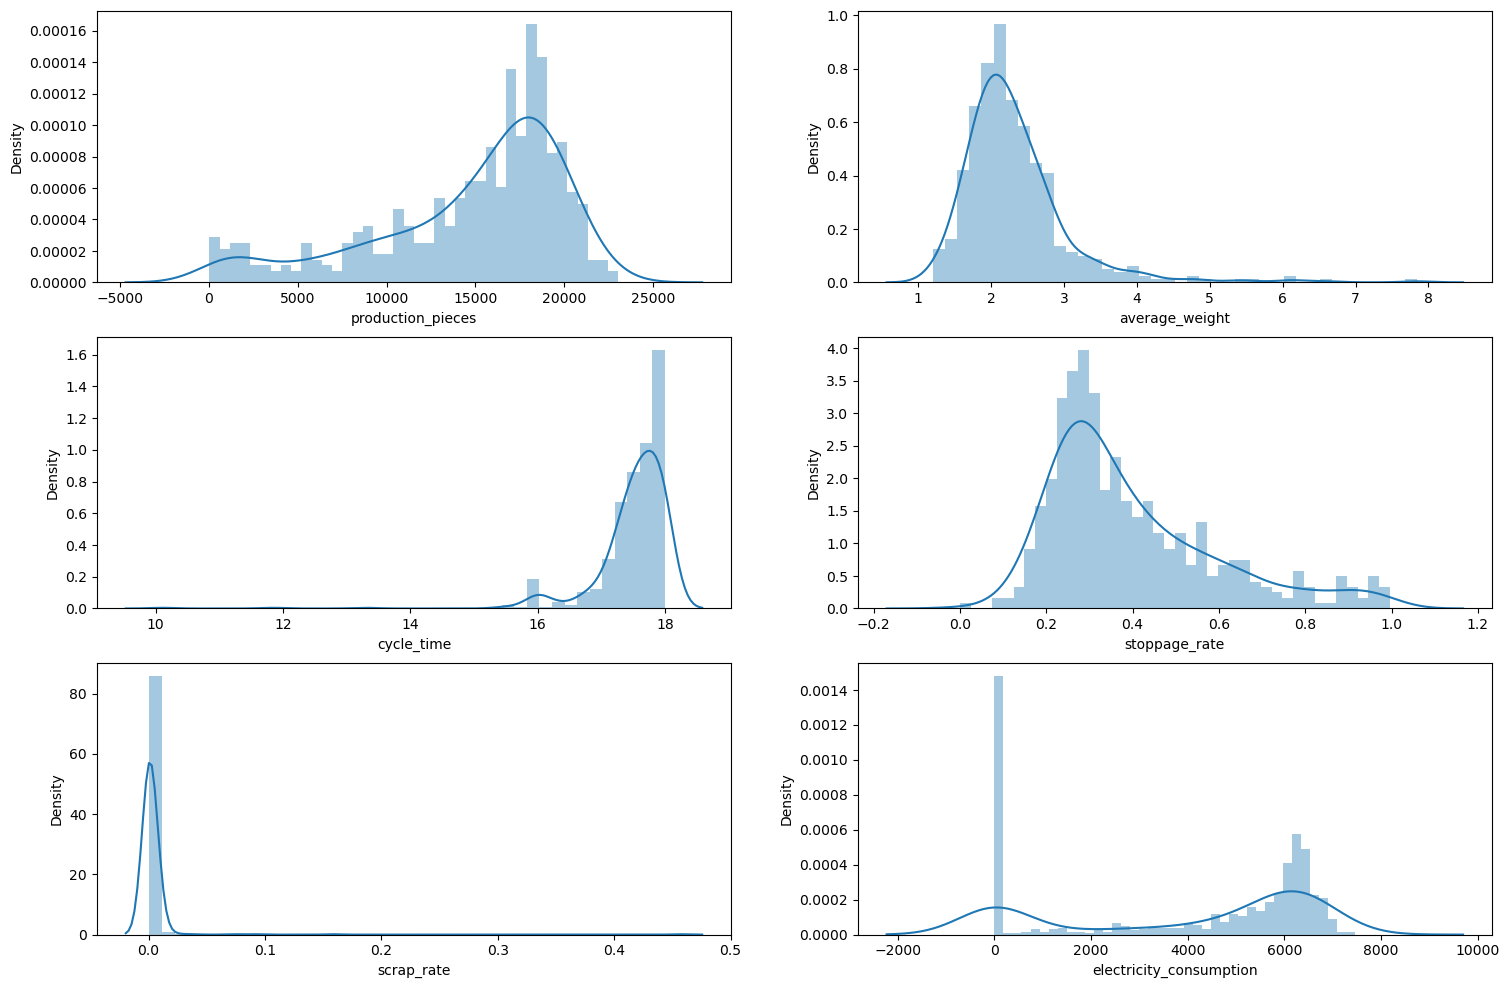

In [17]:
#Değişkenlerde veri nasıl dağılmış? Bu kodun detayını bilmek zorunda değiliz.. 
# Koda sadece kolonları veriypruz
# başka şekillerde de (histogram diye aratırsak...) yapılabiliyor

columns = ['production_pieces', 'average_weight', 'cycle_time',
       'stoppage_rate','scrap_rate', 'electricity_consumption']


def distplot(nrows, ncols, columns):

    rows=nrows
    cols=ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))

    columns = columns
    index=0

    for i in range(rows):
        for j in range(cols):
            sns.distplot(df[columns[index]], ax=ax[i][j], bins=40)
            index+=1

        
distplot(3, 2, columns)
# aşağıdaki uyarı mesajlarını görmek istemiyorsak yukarıda warning ile ilgili kodu 
# aktif edebiliriz

### Bazı Keşifler :
 #### Bu histogramlardan çıkabilecek sonuçlar:

Değişkenlerin dağılımı  ML algoritmaları için genel olarak dengeli görünüyor, üretim yapılmayan günler için de sıfır verisi bulunması gereksiz veri ile algoritmamızın öğrenimini zorlaştırabilir, bunun için üretim olmayan günlerin verileri elimine edilebilir.

### Veride Gürültü (aşırı-anormallik) var mı?

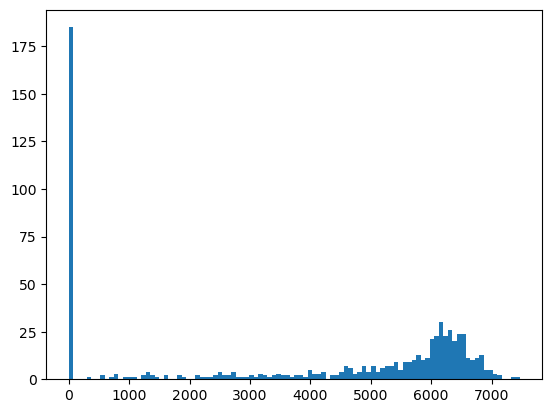

In [18]:
# hedef değişkene (electricity_consumption) odaklanalım;
plt.figure()
plt.hist(df['electricity_consumption'], bins=100)  # bin kutu, her kutuya 100 adet veri
plt.show()

In [19]:
# Sıfır değerli çok veri var (üretimin olmadığı günler), ortalamadan çok aykırı görünüyor.. sıfır değerli kaç veri var ???
df[df['electricity_consumption'] == 0 ].shape

(184, 7)

In [20]:
# 2000 altı değerler de ortlamadan uzak görünüyor, 2000 altı (0 dahil) kaç değer var?
df[df['electricity_consumption'] <= 2000 ].shape

(209, 7)

In [21]:
# ML algoritmasının daha iyi öğrenmesi için bu aşırı değerleri çıkarabilriz.. 
df = df[df['electricity_consumption'] >= 2000]
df.shape

(460, 7)

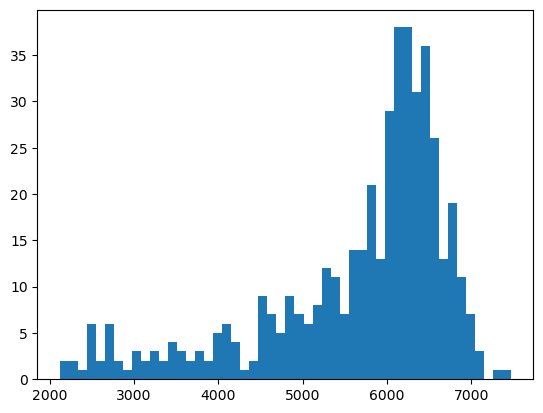

In [22]:
# Önceki elemeden sonra şimdi histograma bakalım
plt.figure()
plt.hist(df['electricity_consumption'], bins=50)  # bin kutu, her kutuya 100 adet veri
plt.show()

### Correlation Matrix İle Özniteliklerin Tahmine Etkisini İnceleyelim

In [23]:
#verimizin son hali...
df

,Day,production_pieces,average_weight,cycle_time,stoppage_rate,scrap_rate,electricity_consumption
2,2022-01-03,18359.0,2.349763,17.780925,0.278472,0.000000,6186.224000
3,2022-01-04,14989.0,2.526441,17.637201,0.402778,0.001001,6251.343000
4,2022-01-05,19613.0,2.050241,17.748432,0.225694,0.000714,6961.466000
5,2022-01-06,20261.0,1.780818,17.725779,0.197917,0.002073,6733.263000
6,2022-01-07,3839.0,1.908403,18.000000,0.550000,0.000000,2684.970000
...,...,...,...,...,...,...,...
662,2023-10-25,19756.0,1.503393,17.952824,0.232639,0.001215,6371.296910
663,2023-10-26,16139.0,2.070231,17.675197,0.358333,0.003346,5862.761167
664,2023-10-27,9328.0,2.023907,17.856990,0.634722,0.002466,4025.972444
667,2023-10-30,11455.0,2.944929,16.699433,0.518750,0.002706,4915.154853


<Axes: >

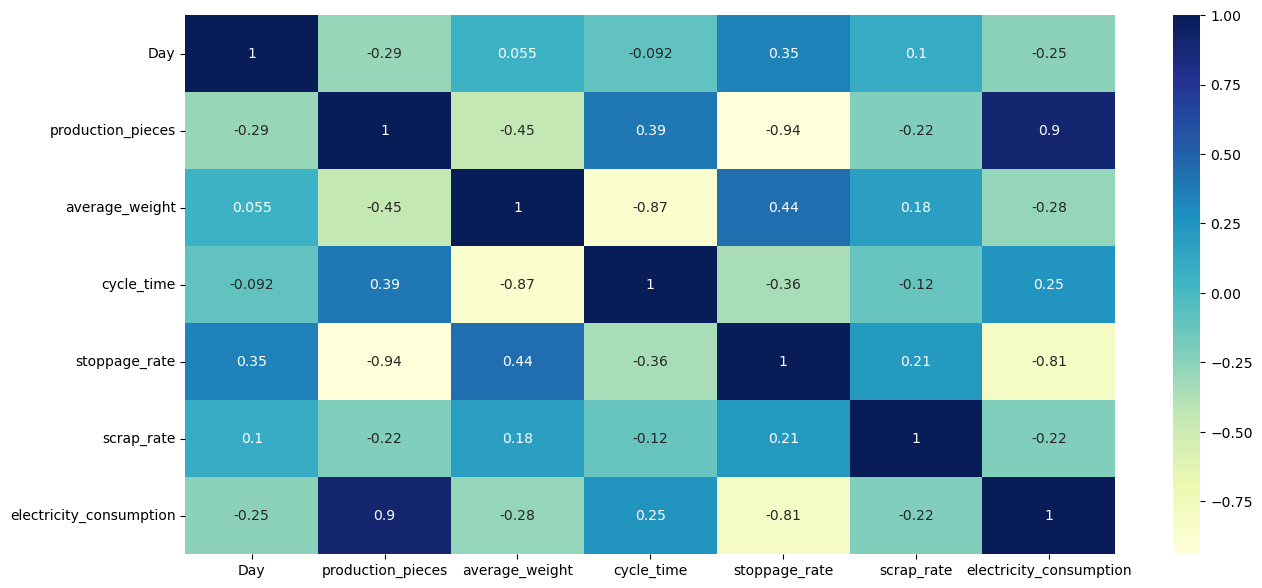

In [24]:
# Özniteliklerin korelasyonunu heatmap ile görelim 
plt.figure(figsize=(15,7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [25]:
# electricity_consumption (elektrik tüketimi) a etki eden öznitelikleri görelim
corr_matrix['electricity_consumption'].sort_values(ascending=False)

electricity_consumption    1.000000
production_pieces          0.903088
cycle_time                 0.248137
scrap_rate                -0.215280
Day                       -0.252059
average_weight            -0.281549
stoppage_rate             -0.807863
Name: electricity_consumption, dtype: float64

#### Üretim adeti ve ortalama ürün ağırlığının Etkisi Var mı?

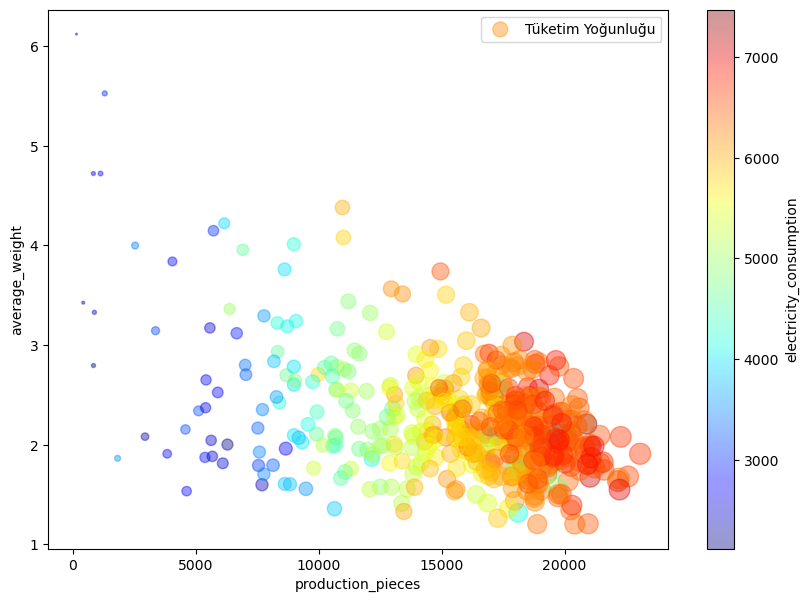

In [26]:
df.plot(kind='scatter', x='production_pieces', y='average_weight', alpha=0.4, label='Tüketim Yoğunluğu',
            figsize=(10,7),c='electricity_consumption',s=df['production_pieces']/100, cmap=plt.get_cmap('jet') ,colorbar=True)
              
plt.legend()

### Preprocessing Ön-İşleme

In [27]:
df.isna().sum()  #boş alan kontrolü; önceki aşamalarda boş satırları elimine etmiştik ama yine de her sütun için kontrol edelim.

Day                        0
production_pieces          0
average_weight             0
cycle_time                 0
stoppage_rate              0
scrap_rate                 0
electricity_consumption    0
dtype: int64

##### boş alan olmadığı için "housing.dropna(axis=0, inplace=True)" komutuna gerek kalmadı.

#### Kategorik Değerlerin Sayısala Çevrilmesi (Label vs OneHot)¶
##### Tablomuzda kategorik veri olmadığı için bu aşamada birşey yapmamıza gerek yok; olsaydı aşağıdaki gibi düzenleme yapacaktık.
from sklearn.preprocessing import LabelEncoder  # Label Encoder Kullanıyoruz
labelEncoder = LabelEncoder()
print(df["kategorik_sutun_adi"].value_counts())
df["kategorik_sutun_adi"] = labelEncoder.fit_transform(housing["kategorik_sutun_adi"])
print(housing["kategorik_sutun_adi"].value_counts())
df.describe()

### Veri Hazır Olduğuna Göre Artık Model Eğitimine Başlayalım

In [28]:
# Gerekli Kütüphaneleri Yükleyelim

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [29]:
#Train Test Bölümlemeleri Oluşturalım
from sklearn.model_selection import train_test_split
X = df.drop(['Day', 'electricity_consumption'], axis=1)
y = df['electricity_consumption']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (368, 5)
x_test : (92, 5)
y_train : (368,)
y_test : (92,)


In [30]:
# Modelleri Denemek İçin Çağılarım (LinearRegression, Lasso)
from sklearn.linear_model import LinearRegression, Lasso

In [31]:
# 1.Algoritma- Lineer Regresyon Train
lr = LinearRegression()
lr.fit(x_train,y_train)
# 
y_predict = lr.predict(x_test) # üretilen modeli (lr) test vverisi ile deneyelim
y_predict  #tahmin ettiği değerleri görelim

array([6128.21416759, 6539.21033682, 6752.65267826, 6627.14200955,
       5194.68546416, 5995.96657272, 6144.286783  , 5929.37094396,
       6866.11288697, 6865.5109821 , 3236.17618346, 5770.53974443,
       5921.50981803, 4524.76338577, 6614.85899798, 4162.64897155,
       5231.33621724, 5699.01180731, 5994.1314051 , 6614.17218611,
       4672.68101351, 5866.85099633, 7165.15573574, 6527.60753999,
       6351.6924588 , 6800.57846133, 4495.12700062, 5657.47892228,
       2233.33331923, 6169.93645873, 6483.00390229, 5709.18817537,
       3152.37255389, 6232.13994385, 6595.87887571, 6150.74642728,
       4166.77833722, 6278.81795082, 6300.38376706, 4215.84802254,
       5994.14746497, 4019.49883187, 5411.72705041, 6275.63137929,
       5400.56928068, 6297.87847814, 5938.06115299, 4796.02156653,
       5963.57407149, 6277.12869026, 5397.58530806, 6609.61416294,
       2986.35986929, 5338.05007231, 5584.83164406, 6828.37238401,
       5807.87126981, 5516.79647161, 4379.73846165, 5733.19081

In [32]:
# metrikleri görelim
Lin_mse = mean_absolute_error(y_test, y_predict)
Lin_rmse = np.sqrt(mean_squared_error(y_test,y_predict))
Lin_r2 = r2_score(y_test,y_predict)
print('mean absolute error: ',Lin_mse)
print('root mean squared error: ',Lin_rmse)
print('Coefficient of determination R^2: ',Lin_r2)

mean absolute error:  337.4639934766811
root mean squared error:  465.06806895720126
Coefficient of determination R^2:  0.8280310507746205


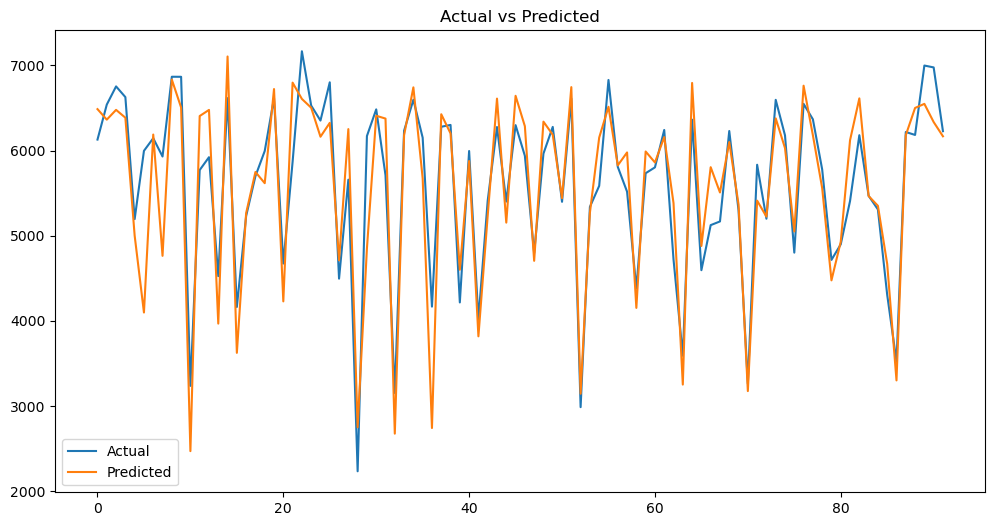

In [33]:
# Tahmin edilen değerler ile gerçek değerleri yanyana grafikte görelim
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  358.830243453238
root mean squared error:  536.8637185972163
Coefficient of determination R^2:  0.7708366811399058


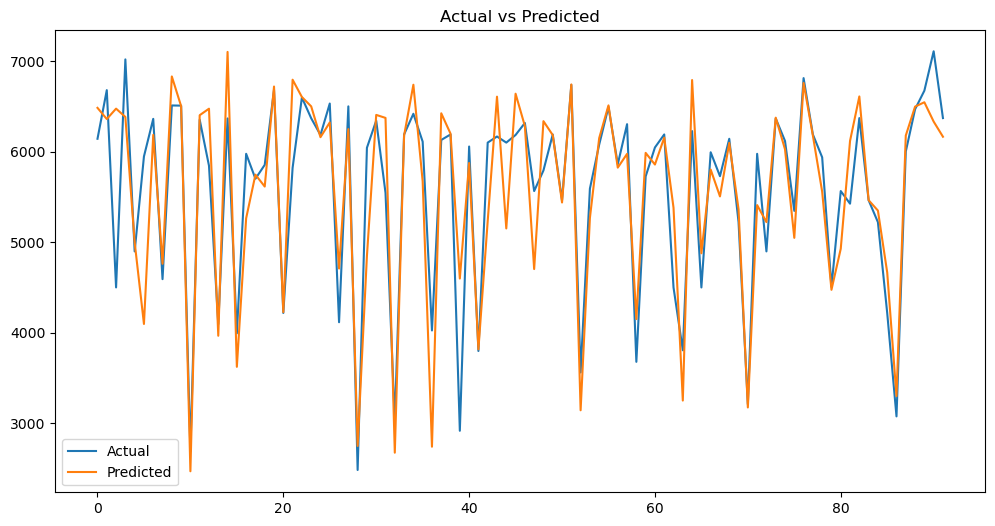

In [34]:
# 2.Algoritma- DecisionTree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='squared_error',splitter='best')
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)
DecTree_mse = mean_absolute_error(y_test, y_predict_dt)
DecTree_rmse = np.sqrt(mean_squared_error(y_test,y_predict_dt))
DecTree_r2 = r2_score(y_test,y_predict_dt)
print('mean absolute error: ',DecTree_mse)
print('root mean squared error: ',DecTree_rmse)
print('Coefficient of determination R^2: ',DecTree_r2)

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_dt,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  337.4745951251087
 root mean squared error:  465.09991958398496
Coefficient of determination R^2:  0.8280074950555959


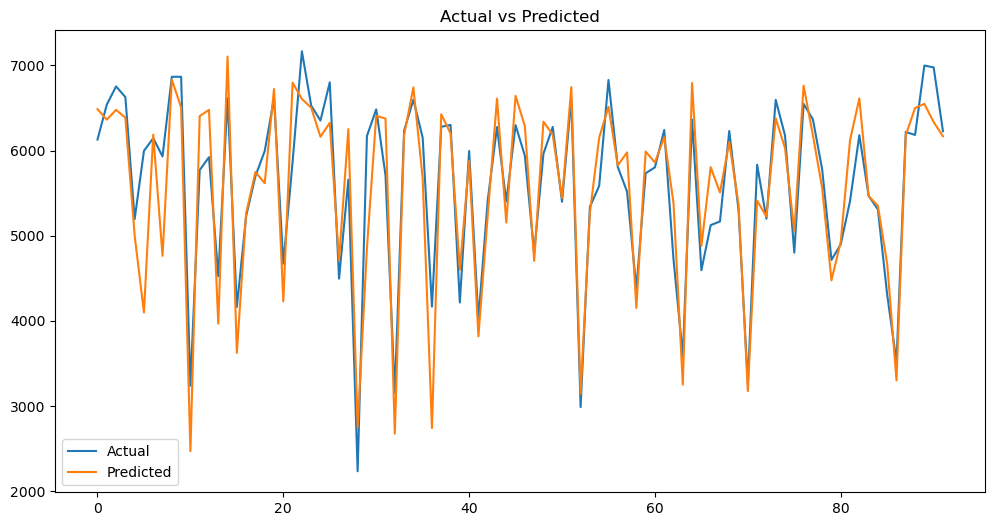

In [35]:
# 3.Algoritma- Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test) 
Lasso_mse = mean_absolute_error(y_test, y_predict_lasso)
Lasso_rmse = np.sqrt(mean_squared_error(y_test,y_predict_lasso))
Lasso_r2 = r2_score(y_test,y_predict_lasso)
print('mean absolute error: ',Lasso_mse)
print(' root mean squared error: ',Lasso_rmse)
print('Coefficient of determination R^2: ',Lasso_r2)

# Lasso İçin Tahmin Grafiği Çizelim
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  312.18727238930825
root mean squared error:  439.8141402553168
Coefficient of determination R^2:  0.8462003422733932


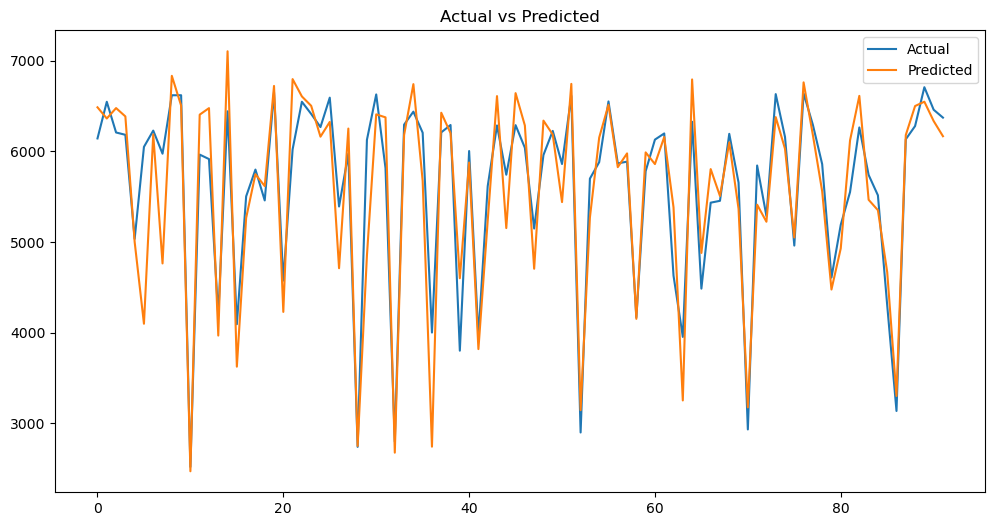

In [36]:
# 4.Algoritma- RandomForest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
RandForest_mse = mean_absolute_error(y_test, y_predict_rf)
RandForest_rmse = np.sqrt(mean_squared_error(y_test,y_predict_rf))
RandForest_r2 = r2_score(y_test,y_predict_rf)
print('mean absolute error: ',RandForest_mse)
print('root mean squared error: ',RandForest_rmse)
print('Coefficient of determination R^2: ',RandForest_r2)

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

Mean Absolute Error (MAE) for SVM:  374.5896189396471
Root Mean Squared Error (RMSE) for SVM:  514.051155310881
Coefficient of determination R^2 for SVM:  0.7898982489441839


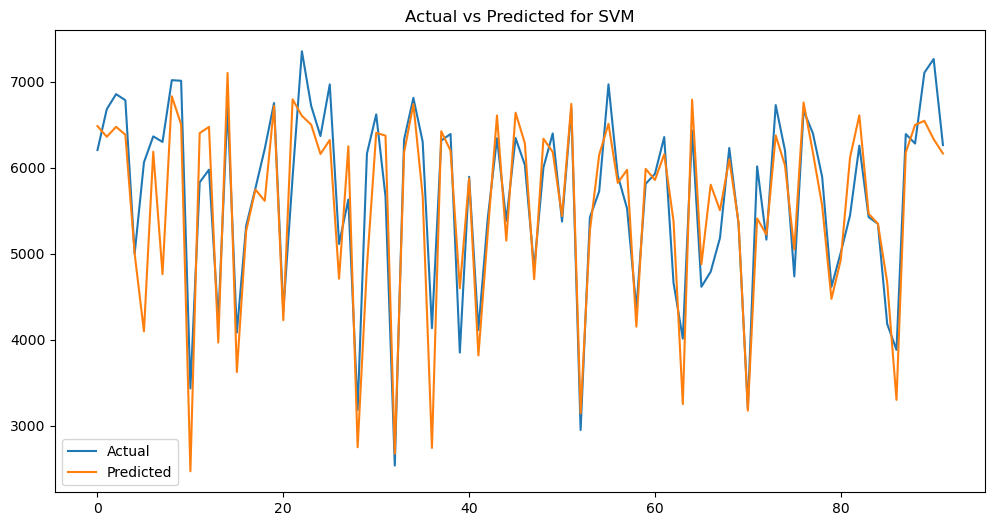

In [37]:
# 5.Algoritma- SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# SVR modelini oluştur
svm_regressor = SVR(kernel='linear')  # 'linear' kernel, doğrusal regresyon için kullanılır, diğer kernel seçenekleri de mevcuttur

# Modeli eğit
svm_regressor.fit(x_train, y_train)

# Tahmin yap
y_predict_svm = svm_regressor.predict(x_test)

# Hata metriklerini hesapla
svm_mae = mean_absolute_error(y_test, y_predict_svm)
svm_rmse = np.sqrt(mean_squared_error(y_test, y_predict_svm))
svm_r2 = r2_score(y_test, y_predict_svm)

# Sonuçları yazdır
print('Mean Absolute Error (MAE) for SVM: ', svm_mae)
print('Root Mean Squared Error (RMSE) for SVM: ', svm_rmse)
print('Coefficient of determination R^2 for SVM: ', svm_r2)

# Grafiği çiz
fig = plt.figure(figsize=(12, 6))
result_svm = pd.DataFrame({'Predicted': y_predict_svm, 'Actual': y_test})
result_svm = result_svm.reset_index()
result_svm = result_svm.drop(['index'], axis=1)
plt.plot(result_svm[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted for SVM')
plt.show()


Mean Absolute Error (MAE) for KNN:  381.42164140580707
Root Mean Squared Error (RMSE) for KNN:  538.5931363558644
Coefficient of determination R^2 for KNN:  0.7693578795826963


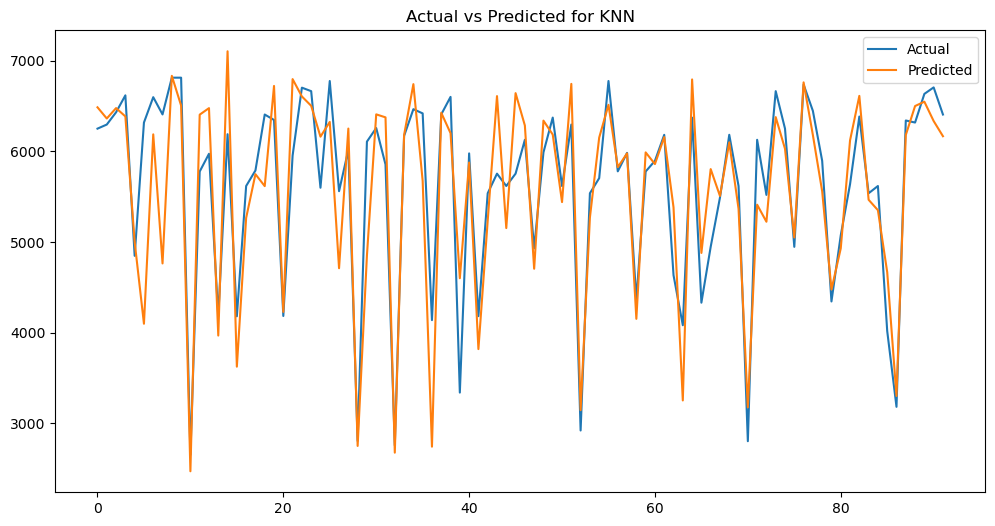

In [38]:
# 6.Algoritma- K-En Yakın Komşu (KNN)
from sklearn.neighbors import KNeighborsRegressor

# KNN modelini oluştur
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # n_neighbors parametresi komşu sayısını belirler, isteğe bağlı olarak değiştirilebilir

# Modeli eğit
knn_regressor.fit(x_train, y_train)

# Tahmin yap
y_predict_knn = knn_regressor.predict(x_test)

# Hata metriklerini hesapla
knn_mae = mean_absolute_error(y_test, y_predict_knn)
knn_rmse = np.sqrt(mean_squared_error(y_test, y_predict_knn))
knn_r2 = r2_score(y_test, y_predict_knn)

# Sonuçları yazdır
print('Mean Absolute Error (MAE) for KNN: ', knn_mae)
print('Root Mean Squared Error (RMSE) for KNN: ', knn_rmse)
print('Coefficient of determination R^2 for KNN: ', knn_r2)

# Grafiği çiz
fig = plt.figure(figsize=(12, 6))
result_knn = pd.DataFrame({'Predicted': y_predict_knn, 'Actual': y_test})
result_knn = result_knn.reset_index()
result_knn = result_knn.drop(['index'], axis=1)
plt.plot(result_knn[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted for KNN')
plt.show()


C:\Users\kembe\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kembe\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Mean Absolute Error (MAE) for K-Means + KNN:  381.42164140580707
Root Mean Squared Error (RMSE) for K-Means + KNN:  538.5931363558644
Coefficient of determination R^2 for K-Means + KNN:  0.770094874747865


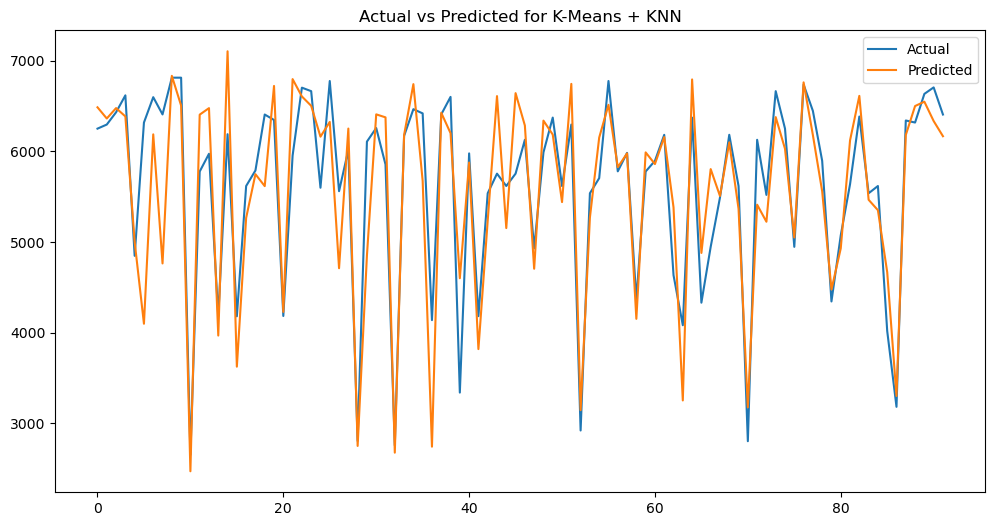

In [39]:
# 7.Algoritma- K-Means Kümeleme (KMeans)
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor

# K-Means modelini oluştur ve eğit
kmeans = KMeans(n_clusters=5, random_state=42)  # İsteğe bağlı olarak küme sayısını belirleyebilirsiniz
kmeans.fit(x_train)

# K-Means ile eğitilen veriyi kullanarak küme etiketlerini al
kmeans_labels_train = kmeans.predict(x_train)
kmeans_labels_test = kmeans.predict(x_test)

# Her küme için merkez noktalarını al
kmeans_centers = kmeans.cluster_centers_

# Her küme için merkeze olan uzaklıkları ölçen bir fonksiyon oluştur
def calculate_distance_to_centers(data, centers):
    distances = np.column_stack([np.linalg.norm(data - center, axis=1) for center in centers])
    return distances

# Eğitim ve test verilerinin küme etiketlerine göre uzaklıkları hesapla
kmeans_distances_train = calculate_distance_to_centers(x_train, kmeans_centers)
kmeans_distances_test = calculate_distance_to_centers(x_test, kmeans_centers)

# K-Means ile hesaplanan uzaklıkları kullanarak KNN modelini oluştur ve eğit
kmeans_regressor = KNeighborsRegressor(n_neighbors=5)  # n_neighbors parametresi komşu sayısını belirler, isteğe bağlı olarak değiştirilebilir
kmeans_regressor.fit(kmeans_distances_train, y_train)

# Test verilerini K-Means ile hesaplanan uzaklıklarla dönüştür ve tahmin yap
kmeans_distances_test = calculate_distance_to_centers(x_test, kmeans_centers)
y_predict_kmeans = kmeans_regressor.predict(kmeans_distances_test)

# Hata metriklerini hesapla
kmeans_mae = mean_absolute_error(y_test, y_predict_knn)
kmeans_rmse = np.sqrt(mean_squared_error(y_test, y_predict_knn))
kmeans_r2 = r2_score(y_test, y_predict_kmeans)

# Sonuçları yazdır
print('Mean Absolute Error (MAE) for K-Means + KNN: ', kmeans_mae)
print('Root Mean Squared Error (RMSE) for K-Means + KNN: ', kmeans_rmse)
print('Coefficient of determination R^2 for K-Means + KNN: ', kmeans_r2)

# Grafiği çiz
fig = plt.figure(figsize=(12, 6))
result_knn = pd.DataFrame({'Predicted': y_predict_knn, 'Actual': y_test})
result_knn = result_knn.reset_index()
result_knn = result_knn.drop(['index'], axis=1)
plt.plot(result_knn[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted for K-Means + KNN')
plt.show()


Mean Absolute Error (MAE) for GBM:  312.35265346067706
Root Mean Squared Error (RMSE) for GBM:  445.59887275815515
Coefficient of determination R^2 for GBM:  0.8421279821649738


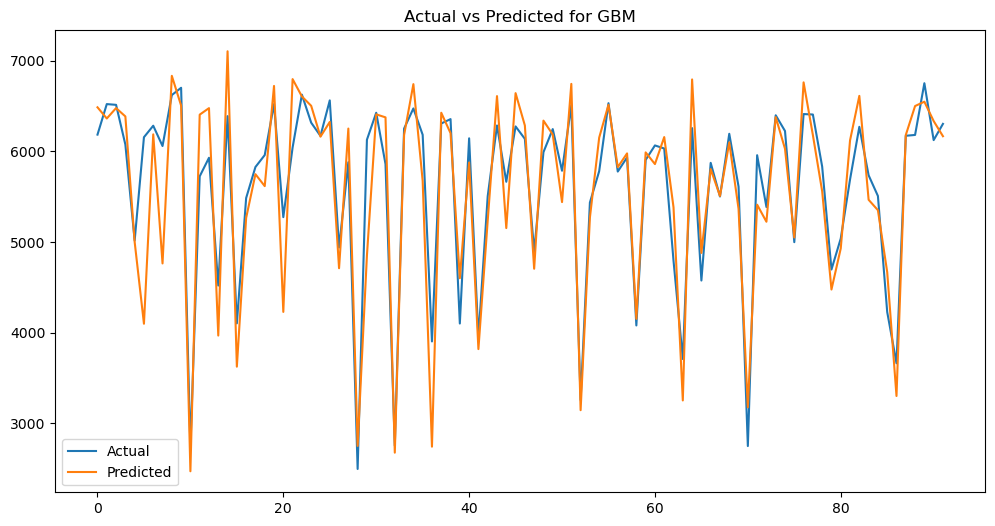

In [40]:
# 8.Algoritma- Gradient Boosting Machines (GBM)
from sklearn.ensemble import GradientBoostingRegressor

# GBM modelini oluştur
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# İsteğe bağlı olarak n_estimators, learning_rate, max_depth ve diğer parametreleri değiştirebilirsiniz

# Modeli eğit
gbm_regressor.fit(x_train, y_train)

# Tahmin yap
y_predict_gbm = gbm_regressor.predict(x_test)

# Hata metriklerini hesapla
gbm_mae = mean_absolute_error(y_test, y_predict_gbm)
gbm_rmse = np.sqrt(mean_squared_error(y_test, y_predict_gbm))
gbm_r2 = r2_score(y_test, y_predict_gbm)

# Sonuçları yazdır
print('Mean Absolute Error (MAE) for GBM: ', gbm_mae)
print('Root Mean Squared Error (RMSE) for GBM: ', gbm_rmse)
print('Coefficient of determination R^2 for GBM: ', gbm_r2)

# Grafiği çiz
fig = plt.figure(figsize=(12, 6))
result_gbm = pd.DataFrame({'Predicted': y_predict_gbm, 'Actual': y_test})
result_gbm = result_gbm.reset_index()
result_gbm = result_gbm.drop(['index'], axis=1)
plt.plot(result_gbm[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted for GBM')
plt.show()


Mean Absolute Error (MAE) for MLP:  671.7307754443292
Root Mean Squared Error (RMSE) for MLP:  846.7259596740995
Coefficient of determination R^2 for MLP:  0.42996339771195324


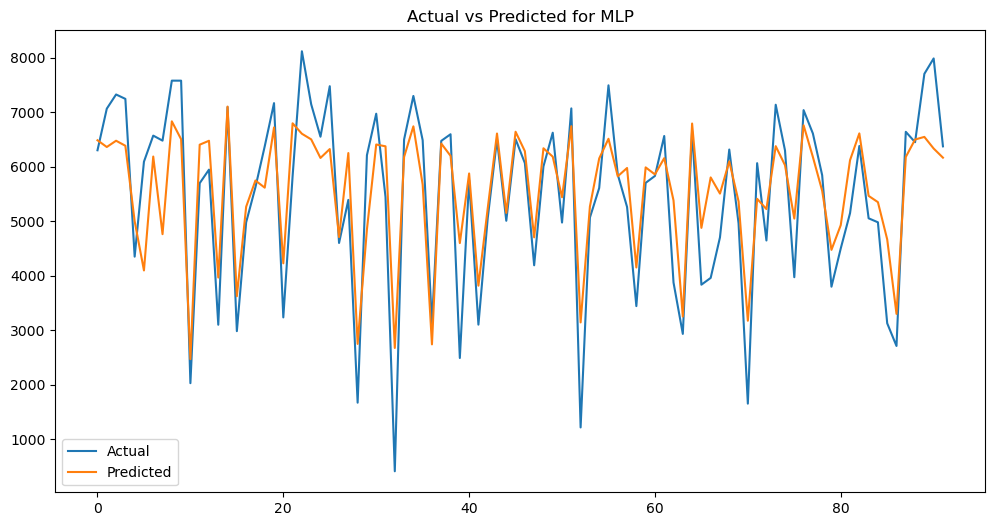

In [41]:
# 9.Algoritma- Yapay Sinir Ağı (MLP)
from sklearn.neural_network import MLPRegressor

# Yapay Sinir Ağı modelini oluştur
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
# İsteğe bağlı olarak hidden_layer_sizes, activation, solver ve diğer parametreleri değiştirebilirsiniz

# Modeli eğit
mlp_regressor.fit(x_train, y_train)

# Tahmin yap
y_predict_mlp = mlp_regressor.predict(x_test)

# Hata metriklerini hesapla
mlp_mae = mean_absolute_error(y_test, y_predict_mlp)
mlp_rmse = np.sqrt(mean_squared_error(y_test, y_predict_mlp))
mlp_r2 = r2_score(y_test, y_predict_mlp)

# Sonuçları yazdır
print('Mean Absolute Error (MAE) for MLP: ', mlp_mae)
print('Root Mean Squared Error (RMSE) for MLP: ', mlp_rmse)
print('Coefficient of determination R^2 for MLP: ', mlp_r2)

# Grafiği çiz
fig = plt.figure(figsize=(12, 6))
result_mlp = pd.DataFrame({'Predicted': y_predict_mlp, 'Actual': y_test})
result_mlp = result_mlp.reset_index()
result_mlp = result_mlp.drop(['index'], axis=1)
plt.plot(result_mlp[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted for MLP')
plt.show()


Mean Absolute Error (MAE) for PCA + Linear Regression:  346.00064166058206
Root Mean Squared Error (RMSE) for PCA + Linear Regression:  476.67022672651586
Coefficient of determination R^2 for PCA + Linear Regression:  0.8193437273371287


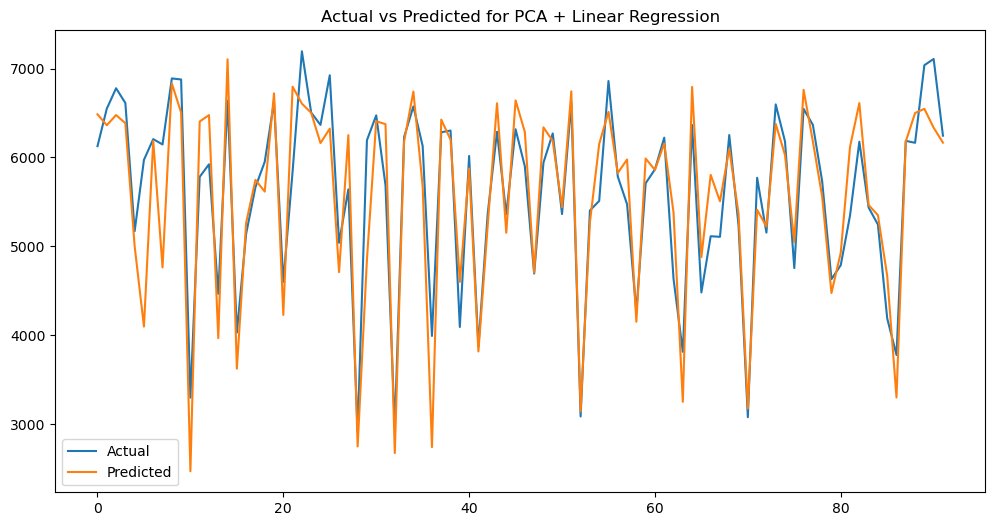

In [42]:
# 10.Algoritma- Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

# PCA modelini oluştur ve eğit
pca = PCA(n_components=3)  # İsteğe bağlı olarak n_components değerini belirleyebilirsiniz
pca.fit(x_train)

# Veriyi PCA ile dönüştür
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# Lineer Regresyon modelini oluştur ve eğit
linear_reg = LinearRegression()
linear_reg.fit(x_train_pca, y_train)

# Tahmin yap
y_predict_pca = linear_reg.predict(x_test_pca)

# Hata metriklerini hesapla
pca_mae = mean_absolute_error(y_test, y_predict_pca)
pca_rmse = np.sqrt(mean_squared_error(y_test, y_predict_pca))
pca_r2 = r2_score(y_test, y_predict_pca)

# Sonuçları yazdır
print('Mean Absolute Error (MAE) for PCA + Linear Regression: ', pca_mae)
print('Root Mean Squared Error (RMSE) for PCA + Linear Regression: ', pca_rmse)
print('Coefficient of determination R^2 for PCA + Linear Regression: ', pca_r2)

# Grafiği çiz
fig = plt.figure(figsize=(12, 6))
result_pca = pd.DataFrame({'Predicted': y_predict_pca, 'Actual': y_test})
result_pca = result_pca.reset_index()
result_pca = result_pca.drop(['index'], axis=1)
plt.plot(result_pca[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted for PCA + Linear Regression')
plt.show()


In [43]:
final_RMSE = pd.DataFrame( data  = [[Lin_rmse, Lasso_rmse, DecTree_rmse, RandForest_rmse, svm_rmse, knn_rmse, kmeans_rmse, gbm_rmse, mlp_rmse, pca_rmse],
                                    [Lin_r2,Lasso_r2,DecTree_r2,RandForest_r2, svm_r2, knn_r2, kmeans_r2, gbm_r2, mlp_r2, pca_r2]],
                          columns  = ['Linear Regression','Lasso','Decision Tree Regressor','Random Forest Regressor', 'SVR', 'KNN', 'KMeans', 'Gradient Boosting Machines (GBM)', 'Yapay Sinir Ağı (MLP)', 'Principal Component Analysis (PCA)'],
                         index =['RMSE','R2'])


final_RMSE = final_RMSE.T

cm = sns.light_palette('green', as_cmap=True)

final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE

,RMSE,R2
Linear Regression,465.068069,0.828031
Lasso,465.099920,0.828007
Decision Tree Regressor,536.863719,0.770837
Random Forest Regressor,439.814140,0.846200
SVR,514.051155,0.789898
KNN,538.593136,0.769358
KMeans,538.593136,0.770095
Gradient Boosting Machines (GBM),445.598873,0.842128
Yapay Sinir Ağı (MLP),846.725960,0.429963
Principal Component Analysis (PCA),476.670227,0.819344


##### Şekilden görüldüğü gibi Random Forests En iyi Modeldir. Çünkü:
R^2 değeri 1 e daha yakın,
root mean squared error (RMSE) değeri 0 a daha yakın daha küçük

### Fine Tuning Grid Search

In [44]:
from sklearn.model_selection import GridSearchCV
# tüm parametreler için değil sadece iki temel parametre için arama yapıyoruz!!!
params_grid = {
    'n_estimators':[10,20,50],
    'max_leaf_nodes':list(range(0,5))}


grid_search = GridSearchCV(RandomForestRegressor(min_samples_split=2,bootstrap=False,random_state=42), params_grid, verbose=1, cv=3)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\kembe\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kembe\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kembe\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\kembe\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
    validate

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(bootstrap=False, random_state=42),
             param_grid={'max_leaf_nodes': [0, 1, 2, 3, 4],
                         'n_estimators': [10, 20, 50]},
             verbose=1)

In [45]:
grid_search.best_params_    # en uygun parametreleri yazdır 

{'max_leaf_nodes': 4, 'n_estimators': 20}

mean absolute error:  401.64440352561786
root mean squared error:  555.0314233104846
Coefficient of determination R^2:  0.7550642736392555


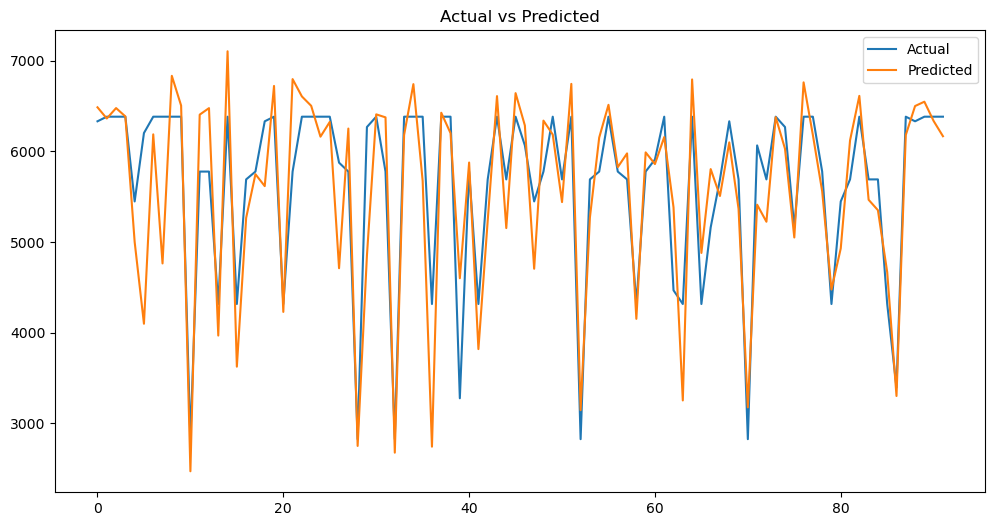

In [46]:
# bulduğumuz parametrelerle test edelim
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,max_leaf_nodes=4)
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()


NOT: Yeni parametrelerle sonuç iyileşmemiştir. Önceki skoru iyi kabul edip bu skorla bir pickle dosyası üretip bunu SERVİSLEYELİM